In [29]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn.datasets import load_breast_cancer # 데이터셋 불러오기
from sklearn.model_selection import train_test_split # 데이터셋 분류
from sklearn.metrics import accuracy_score # 데이터셋 정확도
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer ()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16],
}

rf_clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv = 2, n_jobs = -1)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)

grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.9604780122111447


In [41]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth = 24, 
                                 min_samples_split=2)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:', accuracy_score(y_test, pred))

예측 정확도: 0.9824561403508771


<AxesSubplot:>

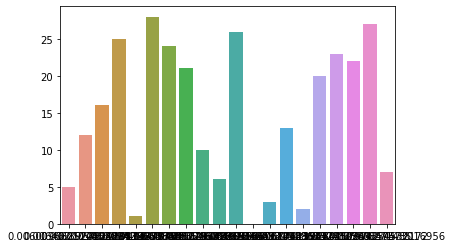

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

sns.barplot(x=ftr_top20, y = ftr_top20.index)